In [1]:
import cv2

img= cv2.imread("img1.jpeg")
img.dtype, img.shape

(dtype('uint8'), (523, 500, 3))

In [3]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(img)
cv2.imshow('Image', img)
cv2.waitKey(0)  ## if we don't do this then the image will disapear in miliseconds and we won't be able to see it 

-1

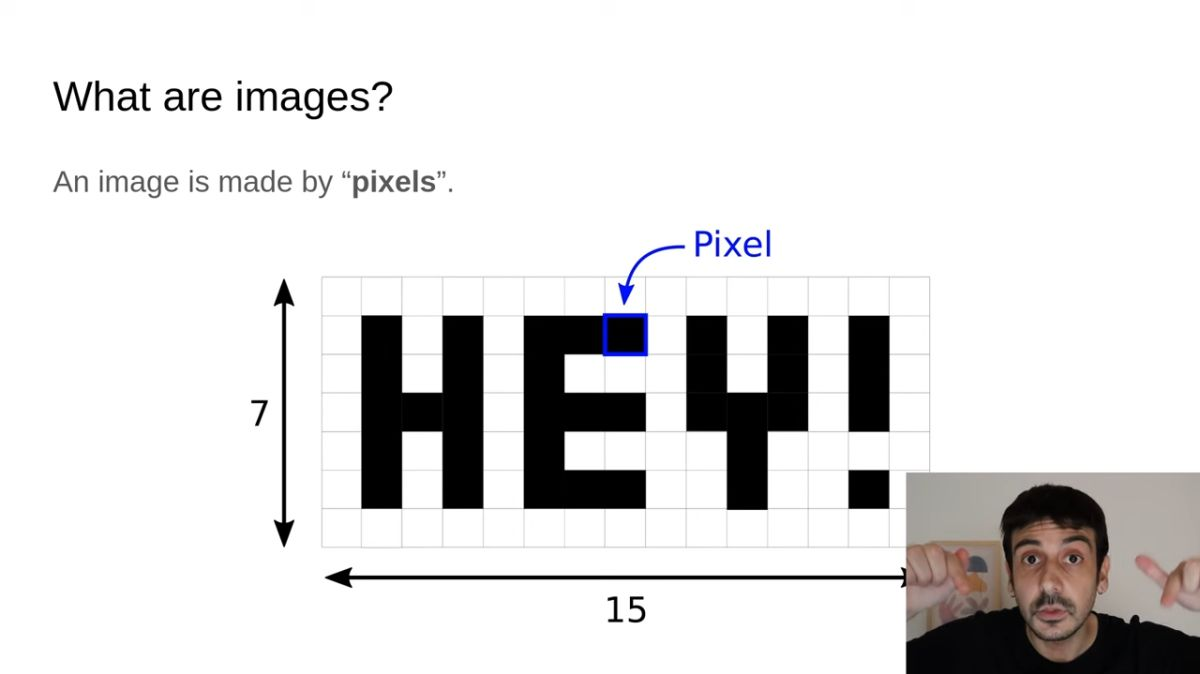

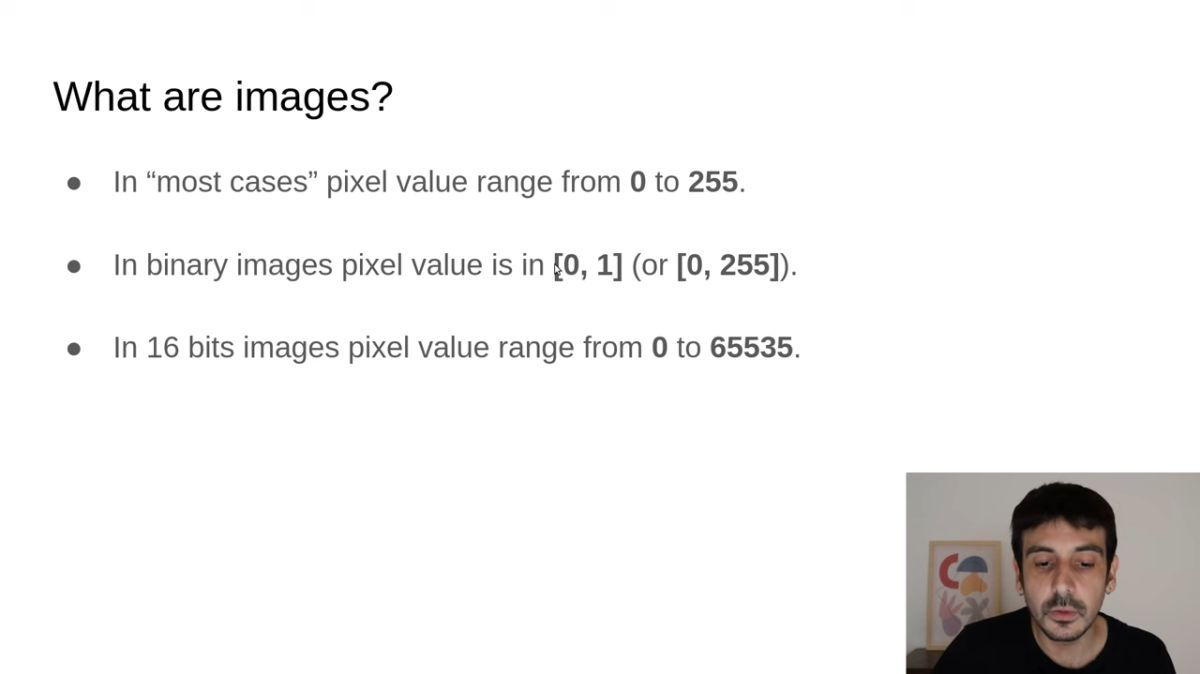

### An image has three color chanel, Green. blue and red

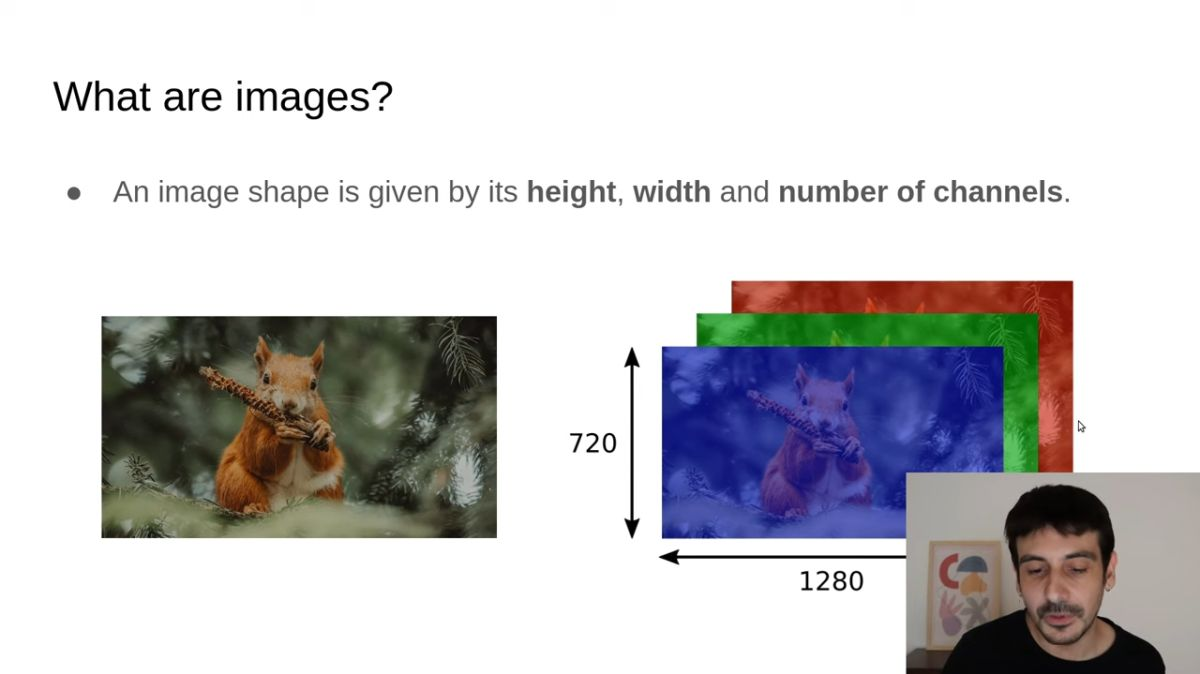

### Using the above concept of RGB these are the values for each color

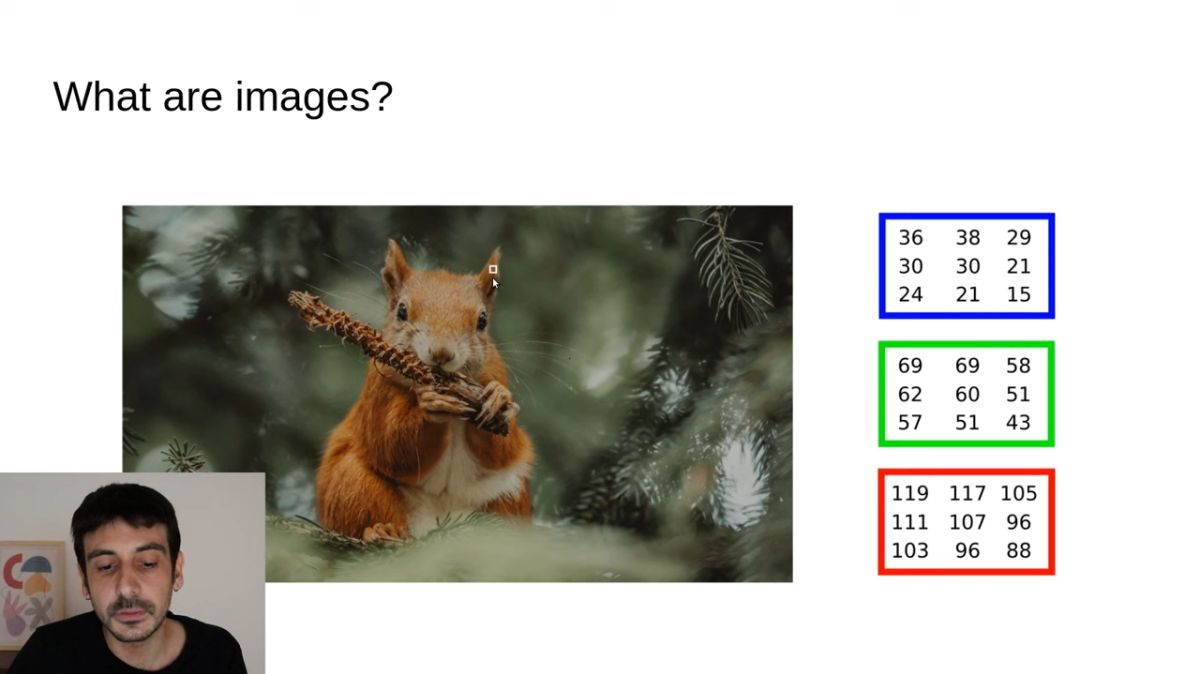

# Input/Output

In [4]:
import cv2

img= cv2.imread('img1.jpeg')

### Writing the image into disk

In [5]:
cv2.imwrite('newimg.png',img)

True

In [6]:
cv2.imshow('Image', img)
cv2.waitKey(0)  ## if we don't do this then the image will disapear in miliseconds and we won't be able to see it 

-1

# Video processing

### Reading image

In [31]:
import cv2

video_path='vid1.mp4'
video=cv2.VideoCapture(video_path)

The video has 24 frames per second so 1 frame every 1/24= 0.041 sec so 41 waitKey

The orignal size of each frame in the video is uint8 (1920, 1080, 3)
So, we are going to resize it

In [32]:
ret=True

while ret:
    ret, frame= video.read()
    
    # When the frames are ended then ret will be false and cv2.imshow will give error without this if condition
    if ret:
        frame= cv2.resize(frame,(700,700))
        cv2.imshow('Frame',frame)
        #print(frame.dtype, frame.shape)

        cv2.waitKey(41)

In [30]:
# opencv will release the memory which it has allocated for video

video.release()
cv2.destroyAllWindows()

# Webcam

Webcam is 30 fps
1/30=0.033

In [17]:
import cv2

webcam=cv2.VideoCapture(0)

while True:
    ret, frame= webcam.read()
    
    cv2.imshow('Frame', frame)
    print(frame.dtype, frame.shape)
    break
    
    # when user press q then it break the loop
    if cv2.waitKey(33) & 0xFF==ord('q'):
        break

uint8 (480, 640, 3)


In [33]:
webcam.release()
cv2.destroyAllWindows()

# Resizing

In [34]:
def showing(img):
    cv2.imshow('Image', img)
    cv2.waitKey(0)

In [35]:
import cv2

img= cv2.imread('img1.jpeg')
print(img.dtype, img.shape)
cv2.imshow('Image', img)
cv2.waitKey(0)

uint8 (523, 500, 3)


-1

In [36]:
cv2.destroyAllWindows()

In [37]:
resized=cv2.resize(img, (300, 200))
showing(resized)

# Croping

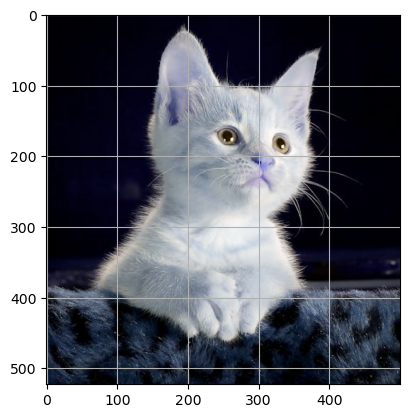

In [38]:
import cv2
import matplotlib.pyplot as plt

# we will not use the cv2 function
img= cv2.imread('img1.jpeg')
plt.imshow(img)
plt.grid()
plt.show()

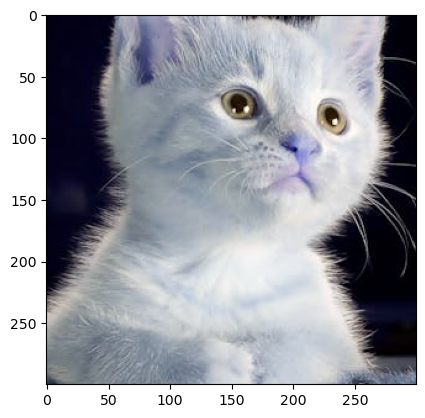

In [41]:
cropedimg= img[100:400, 100: 400]
# column - row
plt.imshow(cropedimg)
plt.show()

# Color spacies

In [6]:
import cv2

img= cv2.imread("img1.jpeg")
img_rgb= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imshow("img",img_rgb)
cv2.imshow("img", img)
cv2.waitKey(0)

-1

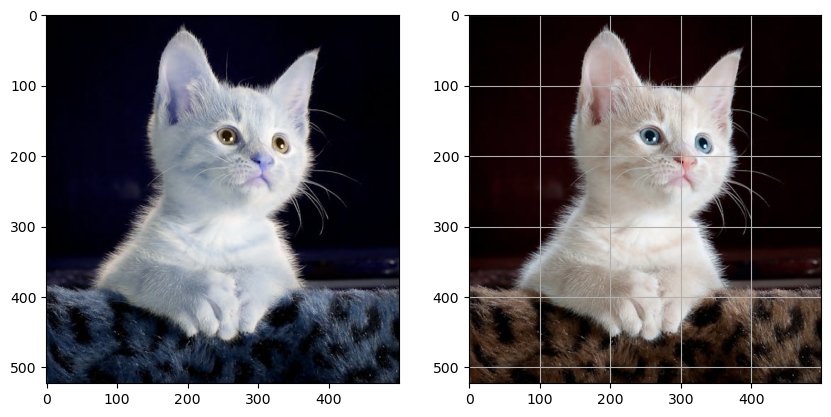

In [8]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(1, 2, figsize=(10, 5)) 
axarr[0].imshow(img)
axarr[1].imshow(img_rgb)
plt.grid()
plt.show()

### Grayscale

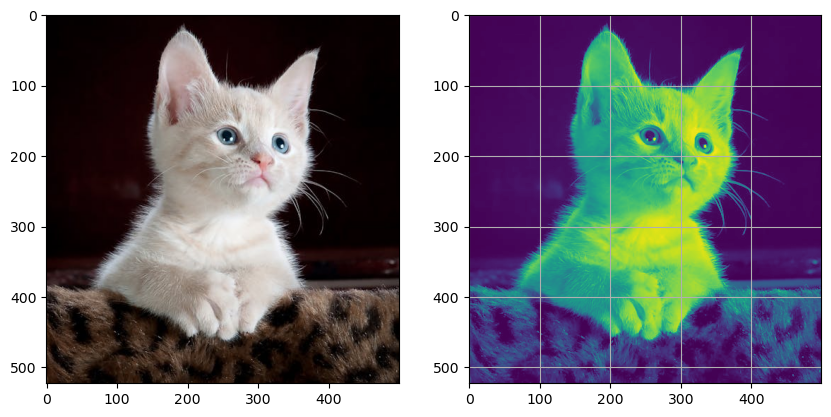

In [12]:
img_gray= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
fig, axarr = plt.subplots(1, 2, figsize=(10, 5)) 
axarr[0].imshow(img_rgb)
axarr[1].imshow(img_gray)
plt.grid()
plt.show()

# the below image is actually black and white

In [13]:
cv2.imshow("img", img_gray)
cv2`.waitKey(0)

-1

# Blurring

The high level inituation for blurring is that we're basically replacing a pixel value with the average of pixels around it

Now the size of the neighborhood depends on the kernal size we put.
- The bigger the kernal the bigger the blur

In [9]:
import cv2

kernal=7
img= cv2.imread("img1.jpeg")
blurredimg=cv2.blur(img,(kernal,kernal))

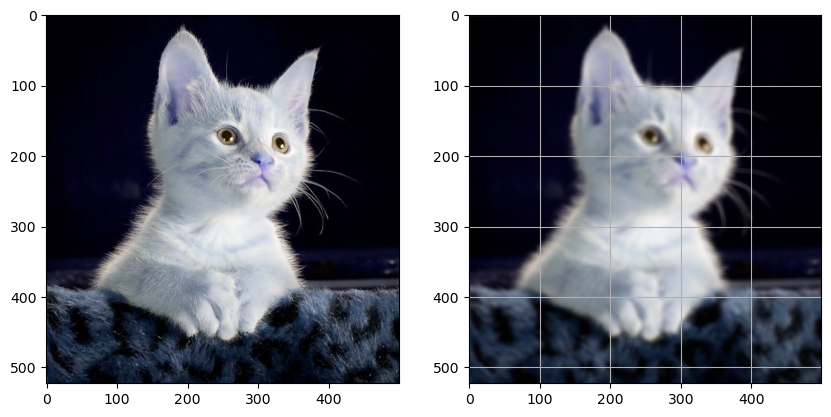

In [12]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(10, 5)) 
axarr[0].imshow(img)
axarr[1].imshow(blurredimg)
plt.grid()
plt.show()

In [18]:
cv2.imshow("img", blurredimg)
cv2.waitKey(0)

-1

In [15]:
Gaussian=cv2.GaussianBlur(img,(kernal,kernal),3)


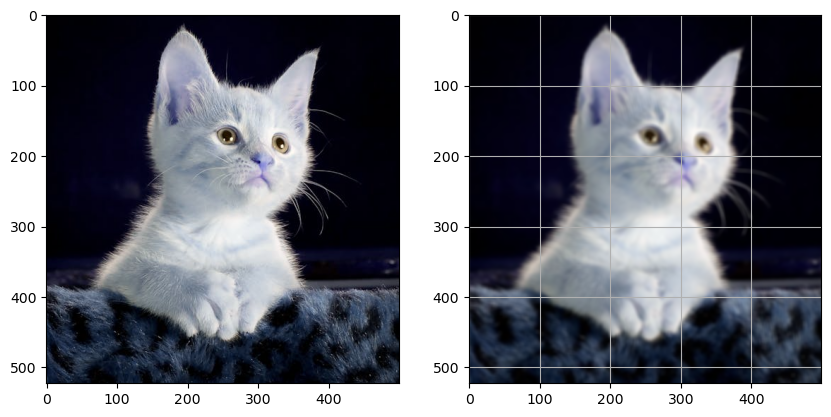

In [16]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(10, 5)) 
axarr[0].imshow(img)
axarr[1].imshow(Gaussian)
plt.grid()
plt.show()

In [18]:
medianblur=cv2.medianBlur(img,kernal)

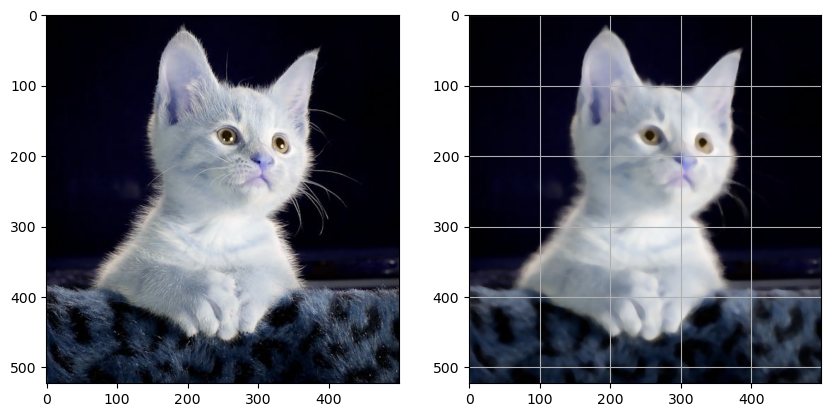

In [19]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2, figsize=(10, 5)) 
axarr[0].imshow(img)
axarr[1].imshow(medianblur)
plt.grid()
plt.show()

## Threshold

The one of the most common use case of thresholding is convert the image into binary

In [6]:
def displayimg(img):
    cv2.imshow("img", img)
    cv2.waitKey(0)  

In [4]:
import cv2

img= cv2.imread("img1.jpeg")
cv2.imshow("img", img)
cv2.waitKey(0)

-1

In [7]:
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
displayimg(img_gray)

80 is a threshold and the values the below it are 0 and the values greater than 80 are 1

In [20]:
ret, tresh= cv2.threshold(img_gray, 80, 255,cv2.THRESH_BINARY)
displayimg(tresh)

The common use case is semantic segmentation

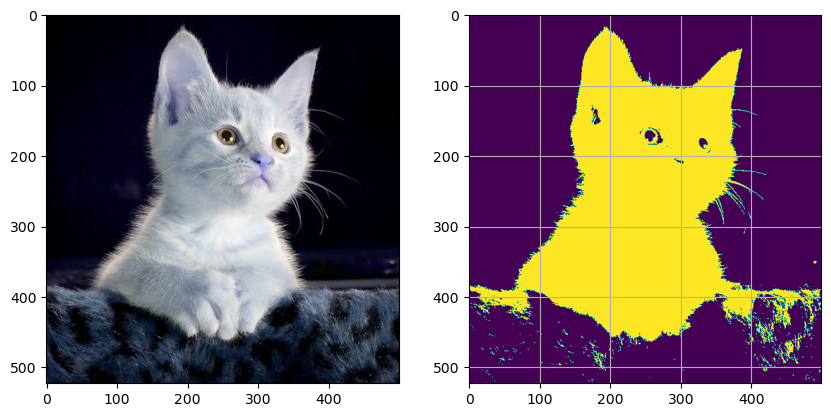

In [22]:
fig, axis= plt.subplots(1, 2, figsize=(10, 5)) 
axis[0].imshow(img)
axis[1].imshow(tresh)
plt.grid()
plt.show()

### Adaptive thresholding

When a global threshold does not work for this example

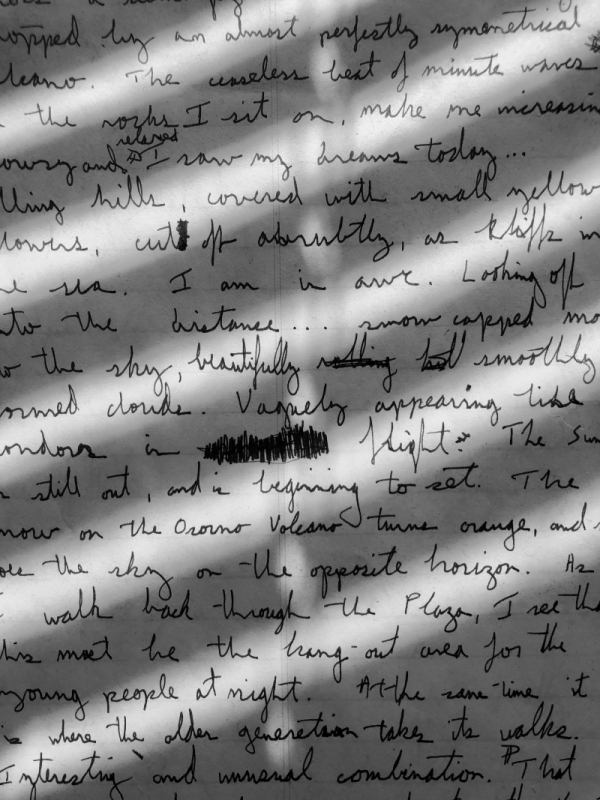

For each pixel in the image, adaptive thresholding computes a threshold based on the pixel values in its local neighborhood. This approach allows for different threshold values in different areas of the image, which is particularly useful when lighting is uneven or when there are shadows and highlights

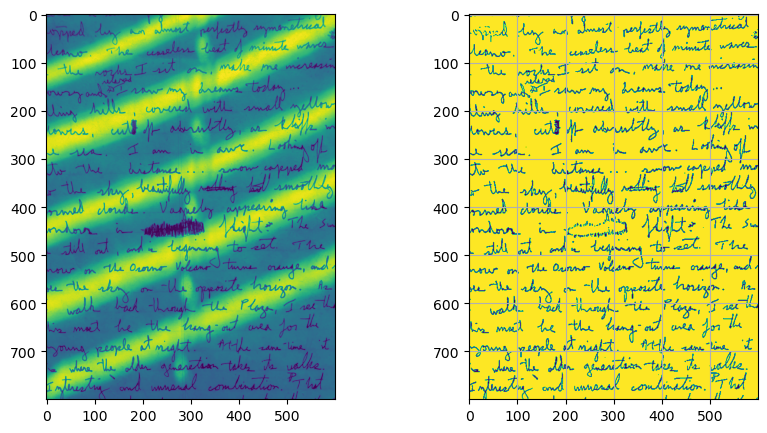

In [27]:
import cv2

img= cv2.imread("handwritten.png")
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh= cv2.adaptiveThreshold(img_gray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21,30)
fig, axis= plt.subplots(1, 2, figsize=(10, 5)) 
axis[0].imshow(img_gray)
axis[1].imshow(thresh)
plt.grid()
plt.show()

In [28]:
displayimg(thresh)

### Edge detections

## canny edge detection

In [31]:
# try the int values with differnet numbers and choose the good ones
new_img= cv2.Canny(img, 100, 200)
displayimg(new_img)

## Dilate: Making the borders more thick

In [41]:
import numpy as np
#we are making the borders more thicker
new_img=cv2.dilate(img, np.ones((2,2), dtype= np.int8))
displayimg(new_img)

## Erode: Reverse of Dilate(making thin)

In [42]:
import numpy as np
#we are making the borders more thicker
erod_img=cv2.erode(new_img, np.ones((2,2), dtype= np.int8))
displayimg(new_img)

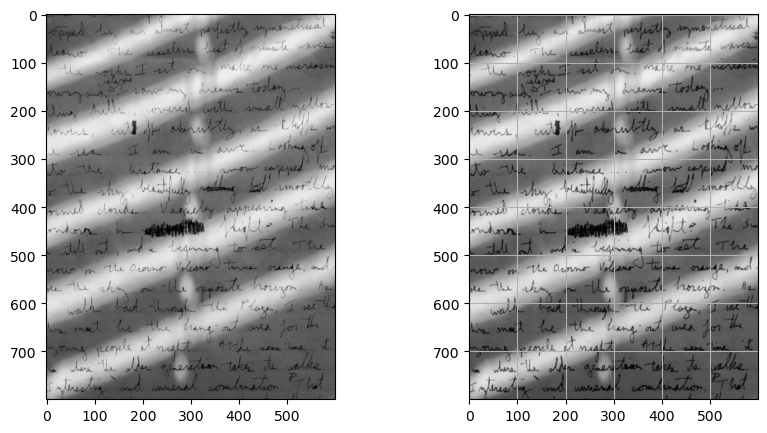

In [43]:
import cv2

fig, axis= plt.subplots(1, 2, figsize=(10, 5)) 
axis[0].imshow(new_img)
axis[1].imshow(erod_img)
plt.grid()
plt.show()

## Drawing

### Line

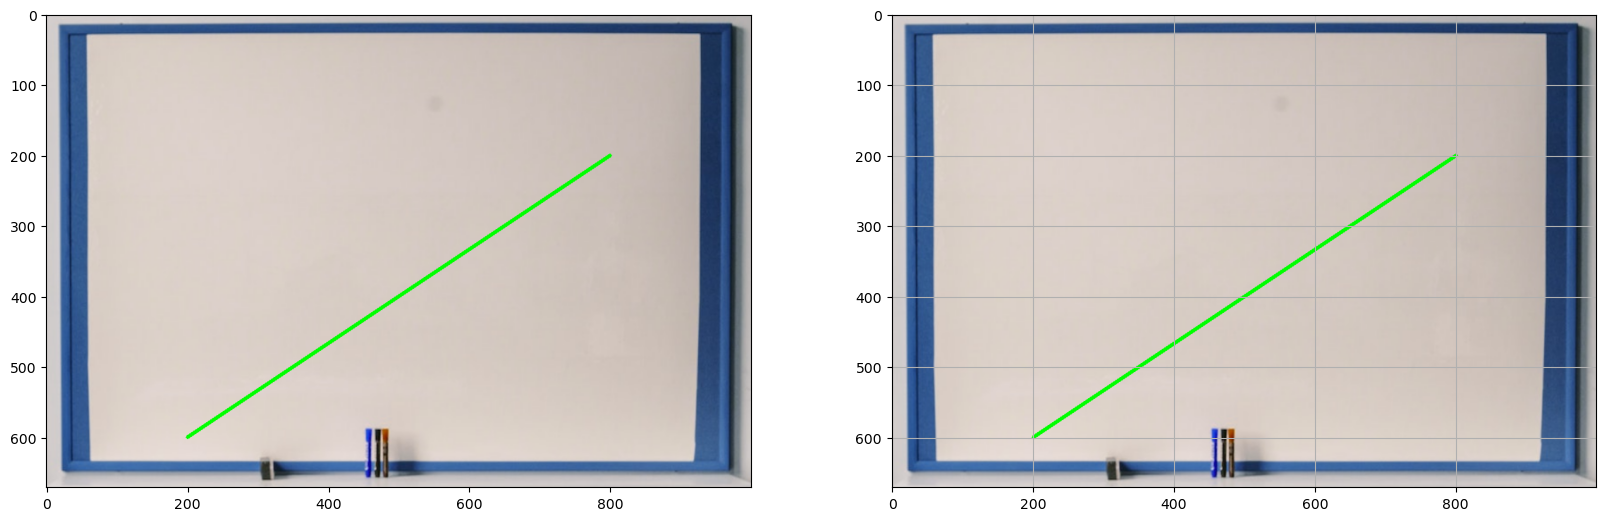

In [12]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("whiteboard.png")

# (200,600) is x and y cordinate of starting point
# (800,200) is x and y cordinate of ending point
# 3 is the thickness
line_img= cv2.line(img, (200,600),(800,200),(0,255,0),3)
fig, axis= plt.subplots(1,2, figsize=(20,10))
axis[0].imshow(img)
axis[1].imshow(line_img)
plt.grid()
plt.show()

### Rectangle

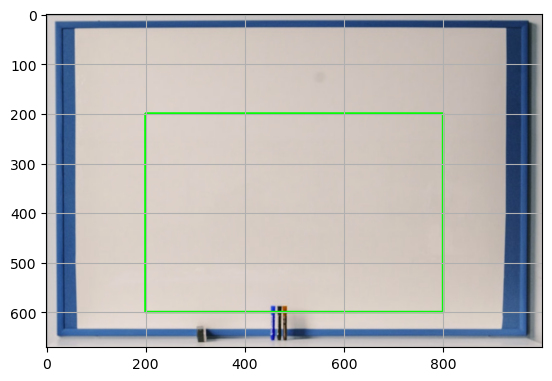

In [3]:
import cv2
import matplotlib.pyplot as plt

# the first argument is img
# second is bottom left corner of rectangle
# third is botton right of rectangle
# (0,255,0) is color 
# if we put -1 instead of 3 then it will display a filled rectangle

img=cv2.imread("whiteboard.png")
cv2.rectangle(img, (200,600),(800,200),(0,255,0),3)
plt.imshow(img)
plt.grid()
plt.show()

### Circle

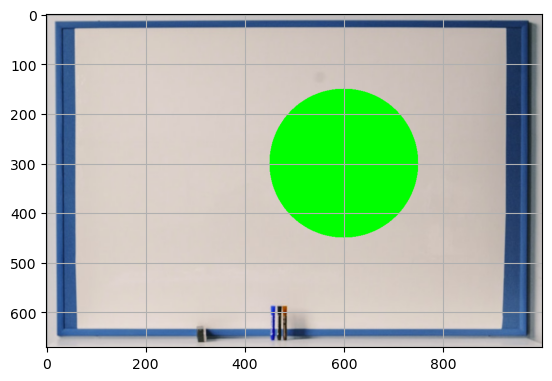

In [5]:
# the first argument is img
# second is center of circle
# third is radius of circle
# (0,255,0) is color 

img=cv2.imread("whiteboard.png")
cv2.circle(img, (600,300),150,(0,255,0),-1)
plt.imshow(img)
plt.grid()
plt.show()

### Text to be put

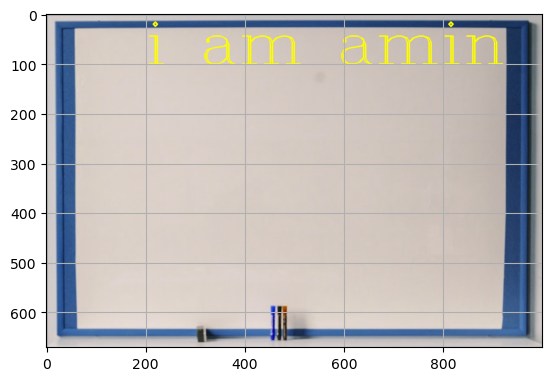

In [7]:
img=cv2.imread("whiteboard.png")
cv2.putText(img, "i am amin",(200,100), cv2.FONT_HERSHEY_COMPLEX, 4,(255,255,0),2)
plt.imshow(img)
plt.grid()
plt.show()

## Contours

In [1]:
import cv2

img= cv2.imread("birds.jpg")
ret, thres= cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

cv2.imshow("img", thres)
cv2.waitKey(0)

-1

In [2]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thres= cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [3]:

# here the small values like 2,3 are noise and we dont need them
for i in contours:
    print(cv2.contourArea(i))

123.0
374.0
0.0
0.0
0.0
341.5
373.0
338.0
4.0
418.0
363.5
2.5
0.0
366.0
0.0
447.5
4.0
499.5
4.0
558.5
4.0
2.0
4.0
463.0
2.0
2.0
7.5
0.0
0.0
509.0
2.0
2.0
298.5
719.0
2.0
2.0
382.0
297.0
0.0
746.5
2.0
8.5
730.5
13.0
7.0
285.0
802.0
5.5
5.5
7.0
4.0
2.0
527.5
4.0
453.0
692.5
7.0
2.0
582.5
5.5
7.0
392.0
364.5
693.0
277.0
629.5
5.5
406.0
516.0
681.5
502.0
403.0
0.0
0.5
882.5
2.0
8.5
7.0
2.0
256.5
2128.0
25.0
2.0
8.5
2.0
4.0
2.0
1020.5
502.0
345.5
772.5
2.0
7.0
4.0
4.0
465.0
366.5
382.0
448.5
406.0
728.5
2.0
547.5
2.0
726.0
2.0
8.5
607.5
445.5
1483.5
114.5
972.0
7.0
7.0
2.0
4.0
490.5
529.5
20.0
456.5
387.0
487.5
537.0
613.0
497.0
517.0
593.5
2.0
17.5
466.5
669.5
4.0
393.0
564.5
851.5
2.0
5.5
2.0
627.5
2.0
5.5
5.5
7.0
497.0
607.5
479.5
393.5
546.0
962.0
2.0
2.0
2.0
2.0
5.5
2.0
1010.0
467.5
846.5
962.5
524.0
431.0
736.0
4.0
2.0
326.0


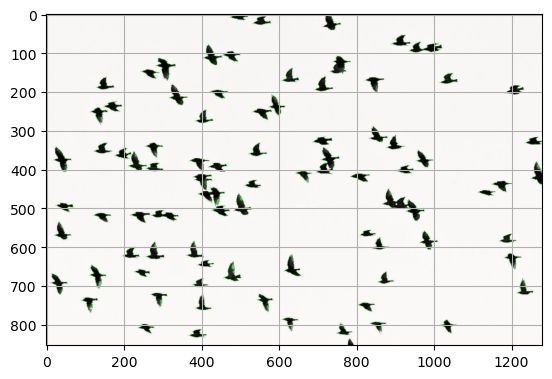

In [5]:
import matplotlib.pyplot as plt


for i in contours:
    if (cv2.contourArea(i) >200):
        # this draw function is now drawing edges over the birds
        cv2.drawContours(img,i, -1, (0,255,0),1)


plt.imshow(img)
plt.grid()
plt.show()

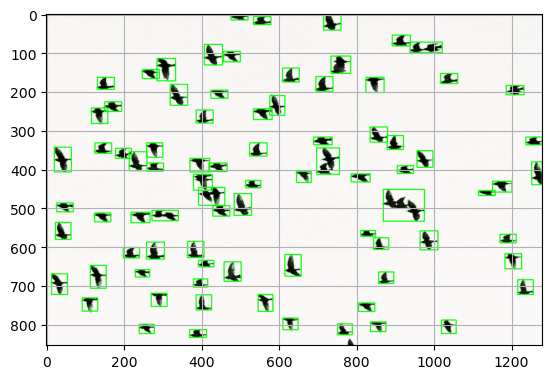

In [7]:
import matplotlib.pyplot as plt


for i in contours:
    if (cv2.contourArea(i) >200):
        x1, y1, w, h= cv2.boundingRect(i)
        
        cv2.rectangle(img, (x1,y1),(x1+w, y1+h), (0,255,0),2)

plt.imshow(img)
plt.grid()
plt.show()